In [1]:
import numpy as np
import pandas as pd
import scipy

from matplotlib import pyplot as plt
import seaborn as sns

sns.set()

In [2]:
# SPECS FOR EXPERIMENT: number of samples and ICS distribution params
N_SAMPLES=5000
ICS = [
    {'mean': 0.0, 'var': 5.0},
    {'mean': 0.0, 'var': 1.0}
]
np.random.seed(1000)

In [3]:
# Get samples according to parameters set in each IC
for i, specs in enumerate(ICS):
    # Sample according to IC's mean and var
    sample_i = np.random.normal(
        specs['mean'],
        specs['var'],
        (N_SAMPLES,)
    )
    ICS[i].update(
        {'sample': sample_i}
    )
    print('-'*100)
    print('IC {}:\nMean: {}\nVar {}\nSample size: {}\nSample:\n{}'.format(
        i+1,
        specs['mean'],
        specs['var'],
        sample_i.shape,
        sample_i
    ))
print('-'*100)

----------------------------------------------------------------------------------------------------
IC 1:
Mean: 0.0
Var 5.0
Sample size: (5000,)
Sample:
[ -4.02229152   1.60465774  -0.1274144  ...  -0.94771221 -11.16673674
  -1.58122632]
----------------------------------------------------------------------------------------------------
IC 2:
Mean: 0.0
Var 1.0
Sample size: (5000,)
Sample:
[ 0.60796251  0.93846369 -0.8482785  ... -0.06434491  0.50570314
 -1.63094421]
----------------------------------------------------------------------------------------------------


In [4]:
# Get Matrix of ICs
I = np.array([
    ic['sample'] for ic in ICS
])

print('-'*100)
print('IC MATRIX')
print('Shape: {}\nMatrix:\n{}'.format(
        I.shape,
        I
    )
)
print('-'*100)

----------------------------------------------------------------------------------------------------
IC MATRIX
Shape: (2, 5000)
Matrix:
[[ -4.02229152   1.60465774  -0.1274144  ...  -0.94771221 -11.16673674
   -1.58122632]
 [  0.60796251   0.93846369  -0.8482785  ...  -0.06434491   0.50570314
   -1.63094421]]
----------------------------------------------------------------------------------------------------


In [5]:
# Get Mixing Matrix
A = np.array([
    [0.5, 0.1],
    [-0.3, 0.3],
    [0, -0.6],
    [0.5, 0.5],
    [0.1, -0.1]
])

print('-'*100)
print('MIXING MATRIX')
print('Shape: {}\nMatrix:\n{}'.format(
        A.shape,
        A
    )
)
print('-'*100)

----------------------------------------------------------------------------------------------------
MIXING MATRIX
Shape: (5, 2)
Matrix:
[[ 0.5  0.1]
 [-0.3  0.3]
 [ 0.  -0.6]
 [ 0.5  0.5]
 [ 0.1 -0.1]]
----------------------------------------------------------------------------------------------------


In [6]:
# Get mixed variables by multiplying A and I
X = pd.DataFrame(
    (A@I).T
)
X.head()

,0,1,2,3,4
0,-1.950350,1.389076,-0.364778,-1.707165,-0.463025
1,0.896175,-0.199858,-0.563078,1.271561,0.066619
2,-0.148535,-0.216259,0.508967,-0.487846,0.072086
3,1.698743,-0.702685,-0.527602,2.050478,0.234228
4,-0.767944,0.403338,0.095714,-0.831754,-0.134446


In [7]:
X.describe()

,0,1,2,3,4
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,-0.031299,0.014572,0.007013,-0.035975,-0.004857
std,2.527397,1.540946,0.604814,2.579810,0.513649
min,-9.582749,-5.684836,-2.056822,-9.762788,-1.862538
25%,-1.767262,-1.036785,-0.408675,-1.795518,-0.357159
50%,-0.014247,0.007722,0.007869,0.003584,-0.002574
75%,1.742482,1.071478,0.428156,1.753940,0.345595
max,8.287076,5.587614,2.180815,8.438406,1.894945


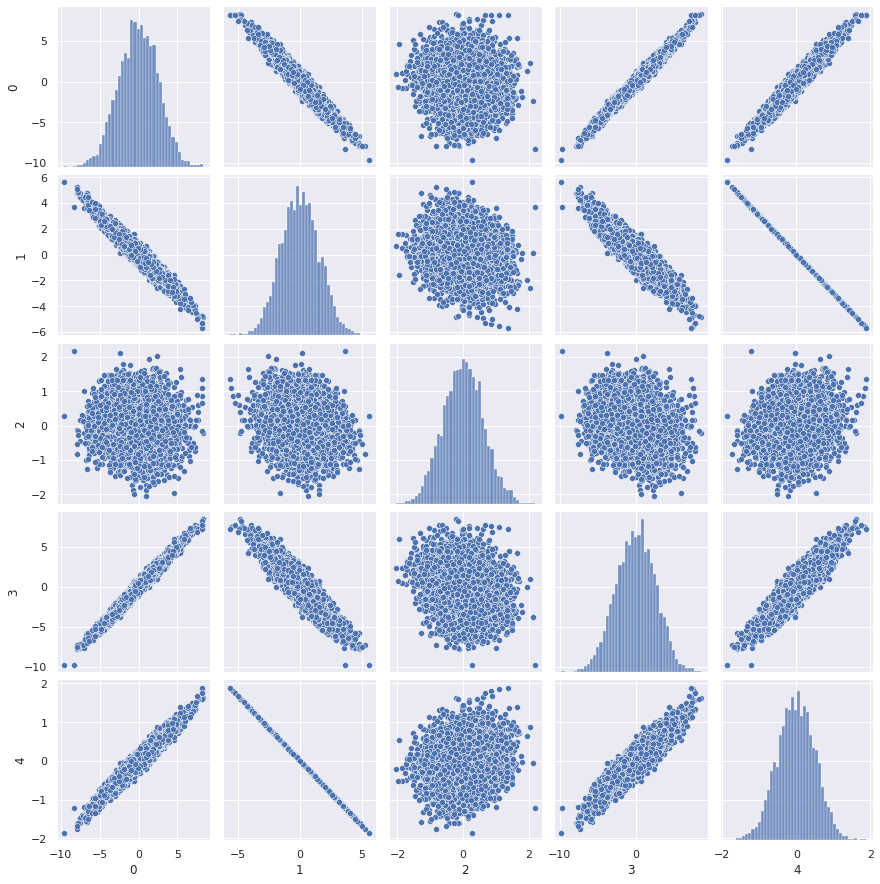

In [8]:
sns.pairplot(X)

In [9]:
pd.DataFrame(X).corr()

,0,1,2,3,4
0,1.000000,-0.971951,-0.051570,0.987743,0.971951
1,-0.971951,1.000000,-0.184748,-0.923329,-1.000000
2,-0.051570,-0.184748,1.000000,-0.206816,0.184748
3,0.987743,-0.923329,-0.206816,1.000000,0.923329
4,0.971951,-1.000000,0.184748,0.923329,1.000000


In [10]:
np.linalg.matrix_rank(pd.DataFrame(X).corr())

3

In [11]:
# Get Z-scores for X
X=(X-X.mean())/np.sqrt(X.var())

# Get eigenvalues for correlation matrix of X
pcs_vars, pcs = np.linalg.eigh(
    a=pd.DataFrame(X).corr()
)

# Transform eigenvectors from cols to rows
pcs = pcs.T

# Sort eigenvectors by eigenvalue size (desc)
pcs_vars, pcs = zip(
    *sorted(
        zip(pcs_vars, pcs),
        reverse=True
    )
)
pcs = np.array(pcs)

In [12]:
print('-'*100)
print('PCS VARIANCES (EIGENVALUES):\n{}'.format(
        pcs_vars
    )
)
print('-'*100)

----------------------------------------------------------------------------------------------------
PCS VARIANCES (EIGENVALUES):
(3.8906055456845117, 1.1093944543154897, 6.146054751877642e-16, 1.9096780283481485e-17, -1.119424828745562e-15)
----------------------------------------------------------------------------------------------------


In [13]:
print('-'*100)
print('CUMULATIVE VARIANCE EXPLAINED:\n{}'.format(
        np.cumsum(pcs_vars)/np.sum(pcs_vars)
    )
)
print('-'*100)

----------------------------------------------------------------------------------------------------
CUMULATIVE VARIANCE EXPLAINED:
[0.77812111 1.         1.         1.         1.        ]
----------------------------------------------------------------------------------------------------


In [14]:
print('-'*100)
print('PRINCIPAL COMPONENTS:\n{}'.format(pcs))
print('-'*100)

----------------------------------------------------------------------------------------------------
PRINCIPAL COMPONENTS:
[[-0.50488625  0.50155147 -0.01993751 -0.49151257 -0.50155147]
 [ 0.08621023  0.13857285 -0.94868257  0.23273228 -0.13857285]
 [ 0.02997859 -0.40853526 -0.30095554 -0.78858865  0.34605481]
 [-0.06777265  0.66380236 -0.02083989 -0.01182819  0.74444549]
 [ 0.85566689  0.34886825  0.0927111  -0.28677362 -0.23513968]]
----------------------------------------------------------------------------------------------------


In [15]:
# First PC
PC_NUMBER=1
pd.DataFrame(
    index=[0],
    data = dict(zip(X.corr().columns,pcs[PC_NUMBER-1]))
)

,0,1,2,3,4
0,-0.504886,0.501551,-0.019938,-0.491513,-0.501551


In [16]:
# Second PC
PC_NUMBER=2
pd.DataFrame(
    index=[0],
    data = dict(zip(X.corr().columns,pcs[PC_NUMBER-1]))
)

,0,1,2,3,4
0,0.08621,0.138573,-0.948683,0.232732,-0.138573


In [17]:
# PROJECTION OF X ONTO PC BASIS
X_pc = np.matmul(X, pcs.T)
X_pc

,0,1,2,3,4
0,1.608771,0.614162,6.978066e-16,-4.277991e-16,1.232721e-15
1,-0.555186,1.005246,-3.037255e-16,4.757173e-17,-5.200027e-17
2,-0.057298,-0.873621,-4.814409e-18,3.209903e-17,-2.499454e-16
3,-1.192405,0.956808,-6.548890e-16,2.273617e-16,-4.319747e-16
4,0.548920,-0.166128,1.962897e-16,-9.852567e-17,3.014359e-16
...,...,...,...,...,...
4995,1.186816,-1.280767,6.178283e-16,-2.429410e-16,4.189506e-16
4996,3.423763,-0.191572,1.524423e-15,-8.008382e-16,2.380937e-15
4997,0.341234,-0.062234,1.425825e-16,-5.611817e-17,2.629013e-16
4998,4.387994,0.448820,2.105292e-15,-7.524839e-16,3.046127e-15


In [18]:
# TRANSPOSE OF IC MATRIX
I_T = I.T
print('-'*100)
print('IC MATRIX TRANSPOSED')
print('Shape: {}\nMatrix:\n{}'.format(
        I_T.shape,
        I_T
    )
)
print('-'*100)

----------------------------------------------------------------------------------------------------
IC MATRIX TRANSPOSED
Shape: (5000, 2)
Matrix:
[[ -4.02229152   0.60796251]
 [  1.60465774   0.93846369]
 [ -0.1274144   -0.8482785 ]
 ...
 [ -0.94771221  -0.06434491]
 [-11.16673674   0.50570314]
 [ -1.58122632  -1.63094421]]
----------------------------------------------------------------------------------------------------


Text(0.5, 1.0, 'Second IC vs Second PC')

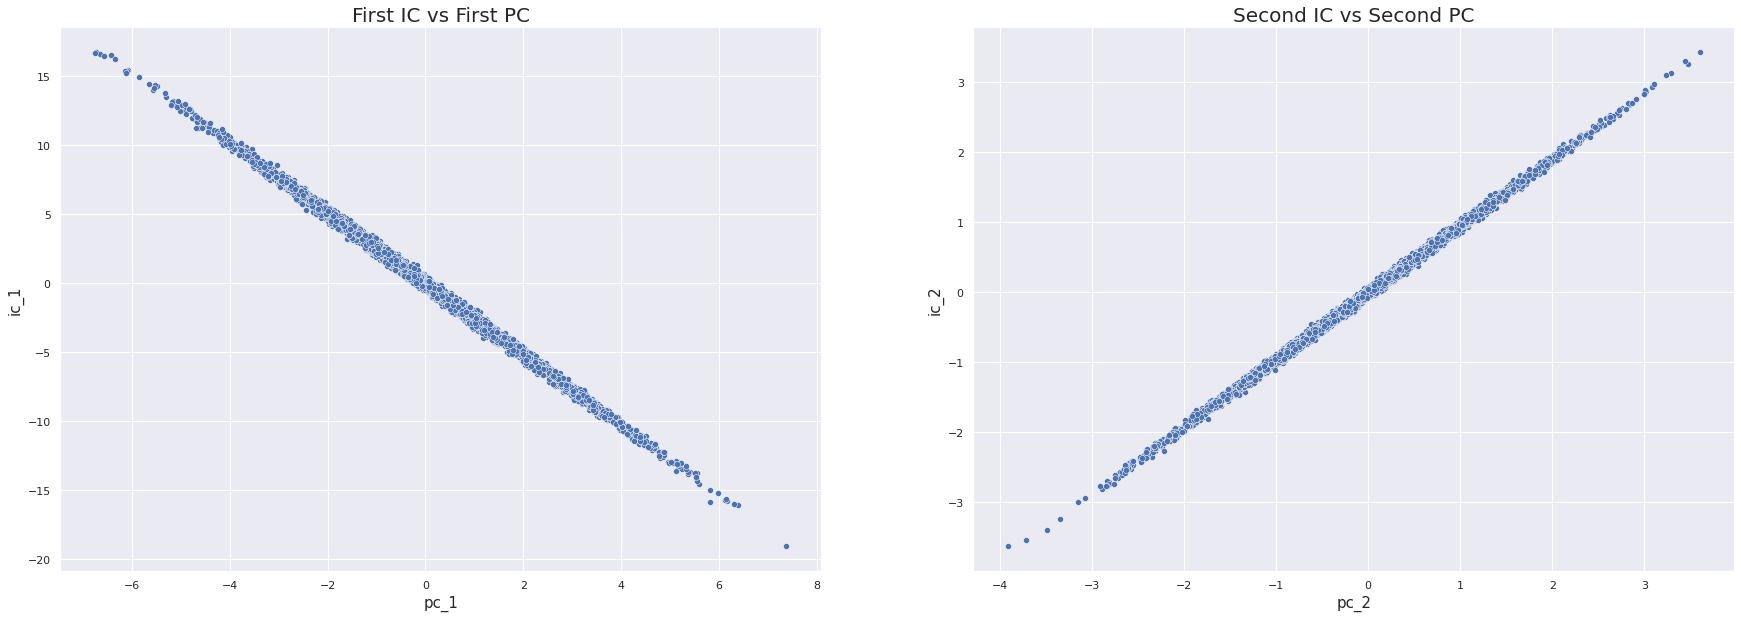

In [19]:
fig, (ax1, ax2) = plt.subplots(
    nrows=1,
    ncols=2,
    figsize=(30,10)
)

# Ax1: first IC
sns.scatterplot(
    x=X_pc[0],
    y=I_T[:,0],
    ax=ax1
)
ax1.set_xlabel('pc_1', fontsize=15)
ax1.set_ylabel('ic_1', fontsize=15)
ax1.set_title('First IC vs First PC', fontsize=20)

# Ax2: second IC
sns.scatterplot(
    x=X_pc[1],
    y=I_T[:,1],
    ax=ax2
)
ax2.set_xlabel('pc_2', fontsize=15)
ax2.set_ylabel('ic_2', fontsize=15)
ax2.set_title('Second IC vs Second PC', fontsize=20)